## `Chapter 1`

`syllabus`
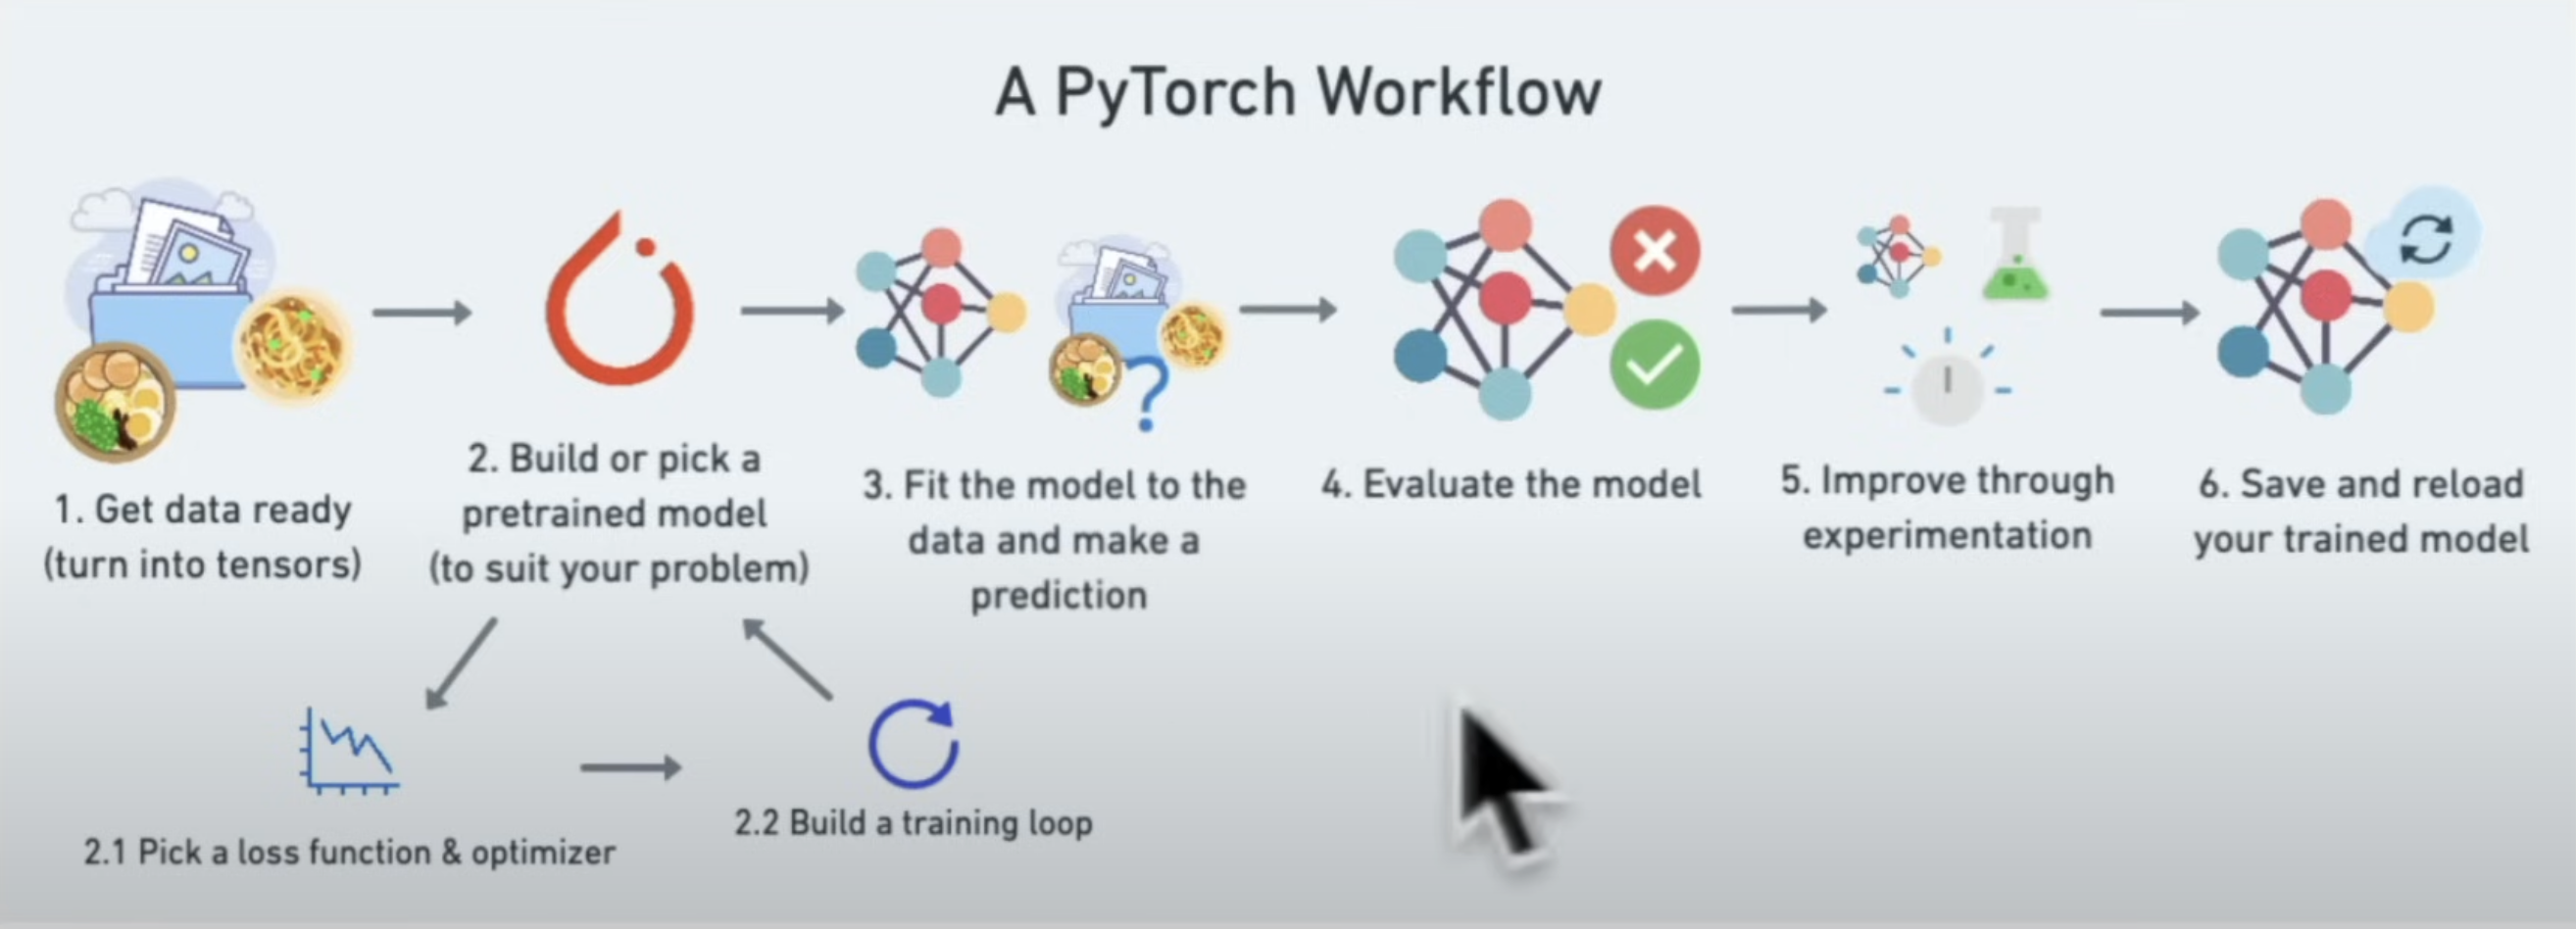

In [253]:
# imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 1. DATA (preparing)

Data will by in any form
* Excel sheet
* Images
* Videso
* Audio
* DNA
* Text

ML has two parts
1. Get -> numerical representation
2. Build model


We will start with **Linear Regressoin**

In [254]:
# create known parameters
weight = 0.7
bias = 0.3

# create a data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
print(X[:10])
print(y[:10])
print(len(X), len(y))
print(X.shape, y.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 50
torch.Size([50, 1]) torch.Size([50, 1])


## splitting the data

In [255]:
# train and test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

In [256]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

`visualizing` the dataset for better understanding
IN `scatter function` 
* `c` means color
* `s` means size of marker
* `marker` -> default is `o`

In [257]:

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test, 
                     test_labels = y_test,
                     prediction = None):
    """
    Plot training data, test data and compare predictions.
    """
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', s=4, label = "Training data")
    
    plt.scatter(test_data, test_labels, c='g' , s= 4, label = "Testing data")
    
    if prediction is not None: 
        plt.scatter(test_data, prediction, c = 'r', s = 4, label ="Predictions")
    

    # show legends
    plt.legend(prop={"size":14});
    


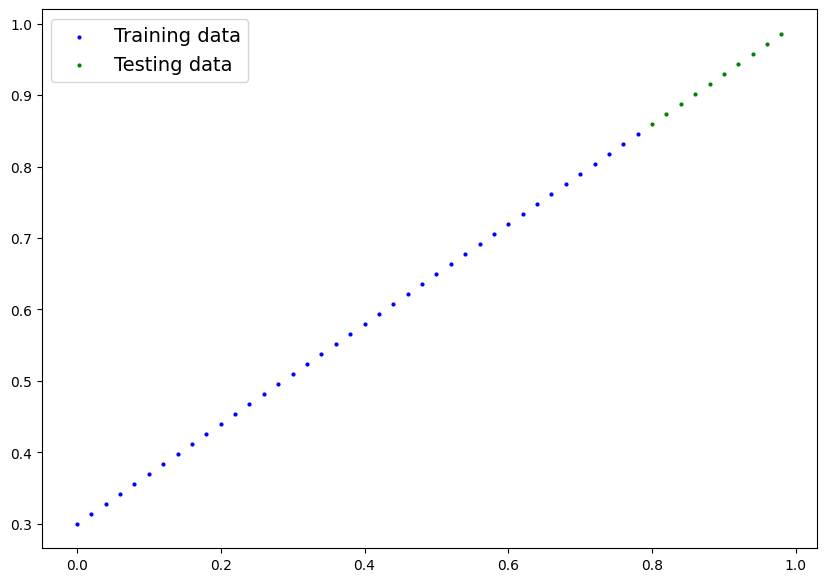

In [258]:
plot_predictions()

# Building Model
Creating first pytorch model

In [259]:
import torch
from torch import nn

In [260]:
# create linear regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, 
                                               dtype = torch.float), 
                                               requires_grad=True)
    
        self.bias = nn.Parameter(torch.rand(1,
                                            dtype = torch.float),
                                            requires_grad = True)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias



In [261]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters()
)

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [262]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [263]:
weight, bias

(0.7, 0.3)

In [264]:
print(X_test)
print(y_test)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [265]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [266]:
# MSE
rst = y_pred - y_test
mse = torch.mean(rst**2)
mse.item()

0.6041861772537231

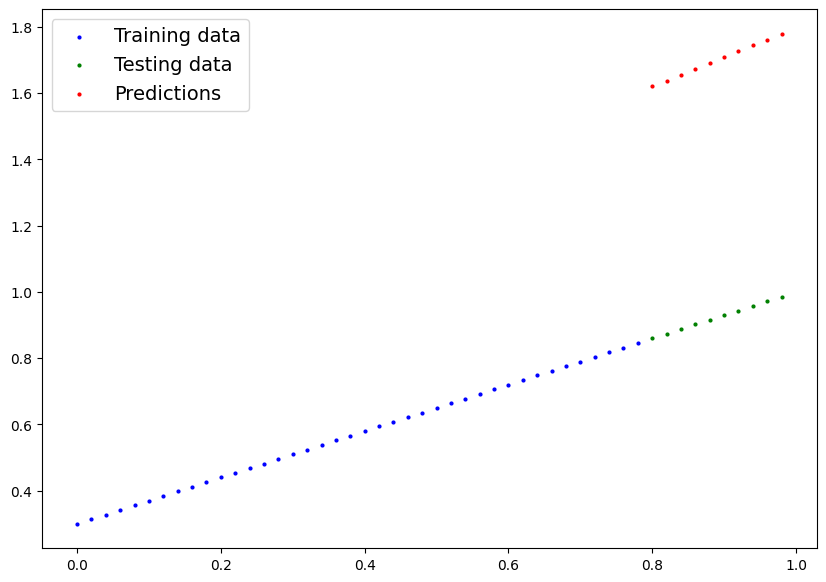

In [267]:
plot_predictions(prediction=y_pred)

## Training `Model`

idea is for a model *unknown* parameters to some *known* parameters

In [268]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [269]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [270]:
## setting losss
loss_fn = nn.L1Loss()

## optimizer
optimzer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)


In [271]:
loss = loss_fn(y_test, y_pred)
print(loss)


tensor(0.7772)


## Building training loop
* 0. Loop through the data
* 1. Forward pass for making prediction
* 2. calcualte loss
* 3. optimizer
* 4. loss backward -> to calculate gradient descent
* 5. Optimizer step - to adjust modeles parameter and improve loss  (`this is gradient descent`)




In [272]:
print(model_0.state_dict().items())
model_0.state_dict()

odict_items([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])


OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [273]:
epochs = 200

epoch_count = []
training_loss = []
testing_loss = []

torch.manual_seed(42)
# step 0
for epoch in range(epochs):
    model_0.train()    # set all the parameters that require gradeints
    
    # step 1 = forward pass
    y_pred = model_0(X_train)

    # step 2 : loss function
    loss = loss_fn(y_pred, y_train)
    # print("loss : ",loss)
    # step 3 : optimizer
    optimzer.zero_grad()

    # step 4 : loss backpropogation
    loss.backward()

    # step 5 : step the optimizer or gradient descent  (updating parameters)
    optimzer.step()
    

    #testing 
    model_0.eval()   # turn off gradeint tracking  -> liek batch, dropout

    with torch.inference_mode(): # turn of gradiet tacking
        # or torch.no_grad() also good but inference mode is do much better than this
        # 1. Do the forward pass 
        test_pred = model_0(X_test)
        
        # test loss
        test_loss = loss_fn(test_pred, y_test)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            training_loss.append(loss.item())
            testing_loss.append(test_loss.item())
            print(f"Epoch : {epoch} | Loss : {loss} | Test Loss {test_loss}")

print(model_0.state_dict())


Epoch : 0 | Loss : 0.6860889196395874 | Test Loss 0.7637526988983154
Epoch : 10 | Loss : 0.5708791017532349 | Test Loss 0.6290428042411804
Epoch : 20 | Loss : 0.45566922426223755 | Test Loss 0.4943329691886902
Epoch : 30 | Loss : 0.34045934677124023 | Test Loss 0.35962313413619995
Epoch : 40 | Loss : 0.2252494841814041 | Test Loss 0.2249133139848709
Epoch : 50 | Loss : 0.1100396141409874 | Test Loss 0.09020347893238068
Epoch : 60 | Loss : 0.009724985808134079 | Test Loss 0.020998019725084305
Epoch : 70 | Loss : 0.006216754671186209 | Test Loss 0.014099234715104103
Epoch : 80 | Loss : 0.002788322512060404 | Test Loss 0.005826681852340698
Epoch : 90 | Loss : 0.007095950655639172 | Test Loss 0.00754010071977973
Epoch : 100 | Loss : 0.007095950655639172 | Test Loss 0.00754010071977973
Epoch : 110 | Loss : 0.007095950655639172 | Test Loss 0.00754010071977973
Epoch : 120 | Loss : 0.007095950655639172 | Test Loss 0.00754010071977973
Epoch : 130 | Loss : 0.007095950655639172 | Test Loss 0.0075

In [274]:
print(epoch_count)
print(training_loss)
print(testing_loss)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
[0.6860889196395874, 0.5708791017532349, 0.45566922426223755, 0.34045934677124023, 0.2252494841814041, 0.1100396141409874, 0.009724985808134079, 0.006216754671186209, 0.002788322512060404, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172, 0.007095950655639172]
[0.7637526988983154, 0.6290428042411804, 0.4943329691886902, 0.35962313413619995, 0.2249133139848709, 0.09020347893238068, 0.020998019725084305, 0.014099234715104103, 0.005826681852340698, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973, 0.00754010071977973]


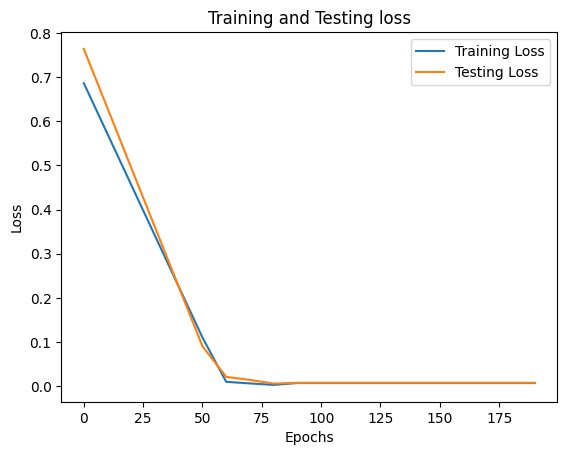

In [275]:
## plot of loss
plt.plot(epoch_count, training_loss, label = "Training Loss")
plt.plot(epoch_count, testing_loss, label = "Testing Loss")
plt.title("Training and Testing loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [276]:
weight, bias

(0.7, 0.3)

In [277]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)


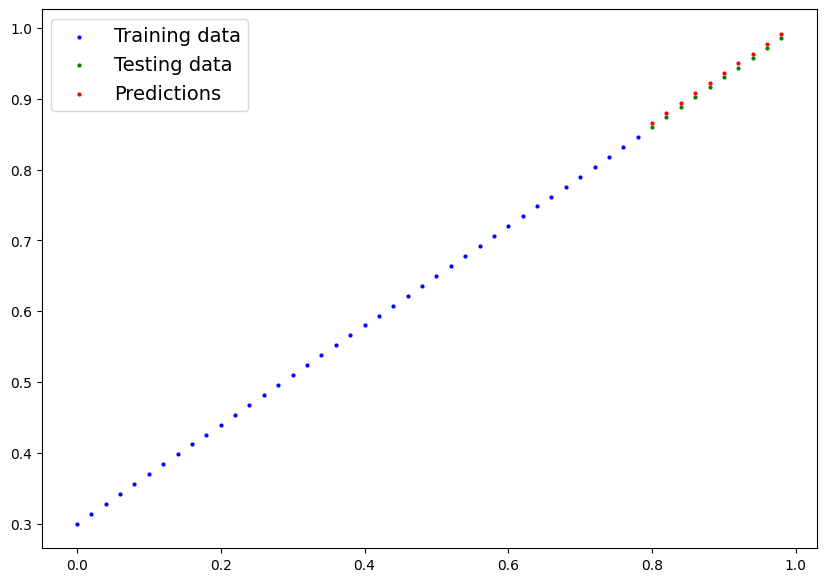

In [278]:
plot_predictions(prediction=y_pred_new)

## Saving the model in pytorch

three main methods 
1. `torch.save()`  - save pytorch object in pythons pickle format
2. `torch.load()` - load the saved pytorch object (model)

3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [279]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [280]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [281]:
# 1. model path directory
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# 2. model name
MODEL_NAME = "chapter1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. saving model
print(f"saving model to path {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)


saving model to path models/chapter1.pth


In [282]:
## create instance of model
loaded_model_0 = LinearRegressionModel()

## load model state dict

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [283]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [284]:
#  make pediction
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds



tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [285]:
model_0.eval()
with torch.inference_mode():
    ypred = model_0(X_test)

ypred

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [286]:
ypred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

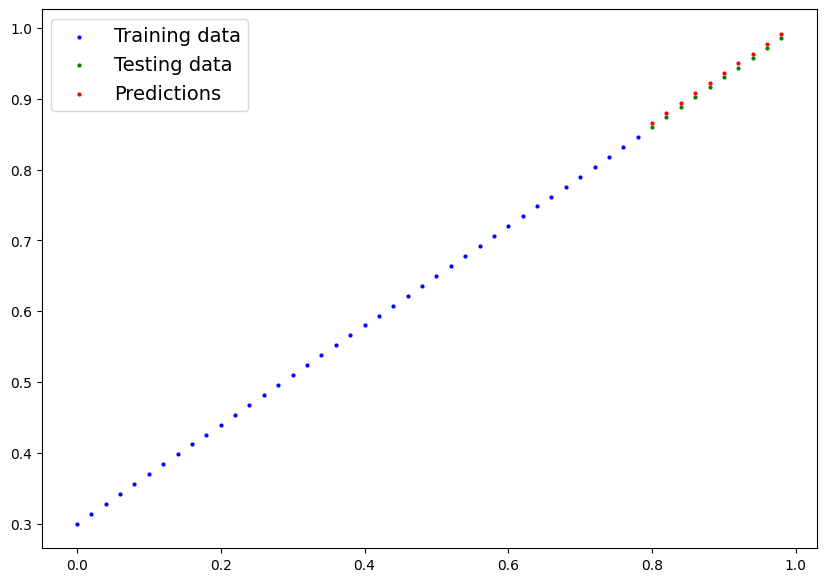

In [287]:
plot_predictions(prediction=loaded_model_preds)

# Putting all together

## import

In [288]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## DATA

In [289]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start=start, end = end, step = step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [290]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [291]:
## Splitting the dataset
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:] , y[split_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

## Plot function 

In [292]:
# plottin\g the data point
# c = color, s = marker size 
def plot_prediction(training_data = X_train,
                    training_label = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    prediction = None
                    ):
    plt.figure(figsize = (10,7))
    plt.scatter(training_data, training_label, c='b', s=4,  label = "Training data")
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing Data")

    if prediction is not None:
        plt.scatter(prediction, test_labels, c = 'r', s = 4, label = "Prediction Data")
    
    plt.legend(prop={"size":14});

## Buiilding the Linear Model

In [293]:
## create a linear regression model

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        ## creating parametes using linear layer ( nn.Linear)

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    
    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)


torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

In [294]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [295]:
## set the model to use tha target device
next(model_1.parameters()).device

device(type='cpu')

In [296]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training code

* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [297]:
## setup loss function
loss_fn = nn.L1Loss()

## seting up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)

In [298]:
## lets write training code
epochs = 150
torch.manual_seed(42)

## putting data to deivce
X_train = X_train.to(device=device)
y_train = y_train.to(device=device)
X_test = X_test.to(device=device)
y_test = y_test.to(device=device)


for epoch in range(epochs):
    model_1.train()

    # forward.pass

    y_pred = model_1(X_train)

    # calculating loss
    loss = loss_fn(y_pred,y_train)
    
    # optmizer
    optimizer.zero_grad()

    # backpropogation
    loss.backward()

    # updating parameter
    optimizer.step()


    ## TESTING

    model_1.eval()

    with torch.inference_mode():
        
        # forward pass
        test_pred = model_1(X_test)


        ## loss
        test_loss = loss_fn(test_pred, y_test)

        ## print
    
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss: {loss} | Test Loss : {test_loss} ")
    



Epoch : 0 | Loss: 0.5551779866218567 | Test Loss : 0.5739762187004089 
Epoch : 10 | Loss: 0.439968079328537 | Test Loss : 0.4392664134502411 
Epoch : 20 | Loss: 0.3247582018375397 | Test Loss : 0.30455657839775085 
Epoch : 30 | Loss: 0.20954833924770355 | Test Loss : 0.16984669864177704 
Epoch : 40 | Loss: 0.09433845430612564 | Test Loss : 0.03513690456748009 
Epoch : 50 | Loss: 0.023886388167738914 | Test Loss : 0.04784907028079033 
Epoch : 60 | Loss: 0.019956795498728752 | Test Loss : 0.045803118497133255 
Epoch : 70 | Loss: 0.016517987474799156 | Test Loss : 0.037530567497015 
Epoch : 80 | Loss: 0.013089174404740334 | Test Loss : 0.02994490973651409 
Epoch : 90 | Loss: 0.009653178043663502 | Test Loss : 0.02167237363755703 
Epoch : 100 | Loss: 0.006215683650225401 | Test Loss : 0.014086711220443249 
Epoch : 110 | Loss: 0.00278724217787385 | Test Loss : 0.005814164876937866 
Epoch : 120 | Loss: 0.0012645035749301314 | Test Loss : 0.013801801018416882 
Epoch : 130 | Loss: 0.0012645035

In [299]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Making and evaluatind prediction

In [300]:
## turn model into eval mode
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

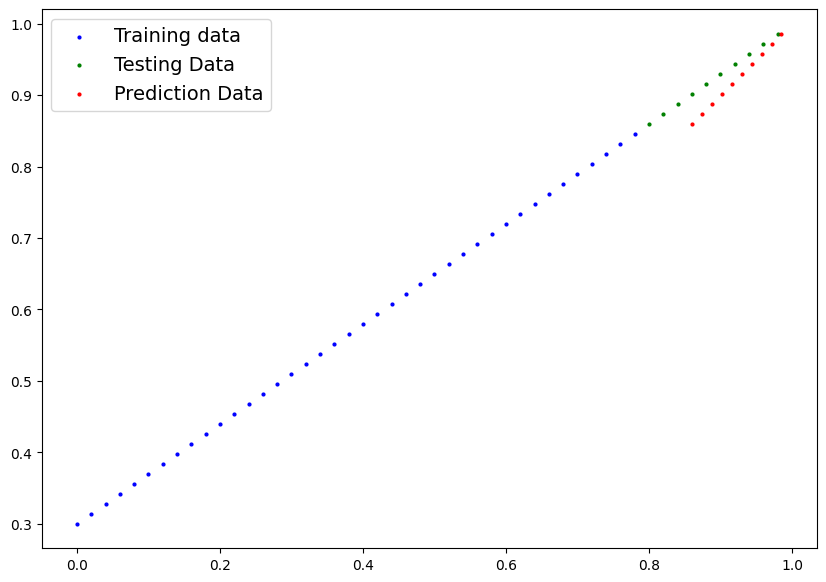

In [301]:
## check out the model prediction visuallyu

plot_prediction(prediction=y_preds.cpu())

### Saving and loading the model

In [302]:
from pathlib import Path

## 1. create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Creating model save path
MODEL_NAME = "Chapter_1_LinearRegreesion.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to : models/Chapter_1_LinearRegreesion.pth


In [303]:
## load the pytorch model
## create a instance of linear model
loaded_model_1 = LinearRegressionModelV2()

## load saved dict of model 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [304]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [305]:
## evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_y_pred = loaded_model_1(X_test)

loaded_y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

In [313]:
loaded_y_pred.cpu()

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

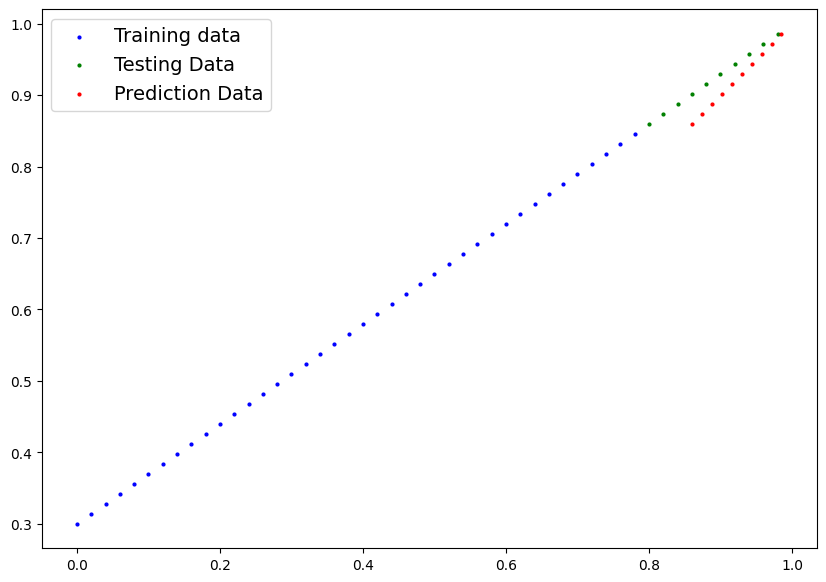

In [306]:
## ploting
plot_prediction(prediction=loaded_y_pred.cpu())